좋은 매칭의 기준은 두개의 특징점과 특징벡터의 유사도가 높은 것을 말합니다.  
그 두개의 특징벡터의 Distance가 작은 것이죠.  
Distance값을 이용해서 솔팅을 하고 작은것을 앞에가게해서 그것을 고르는 것입니다.

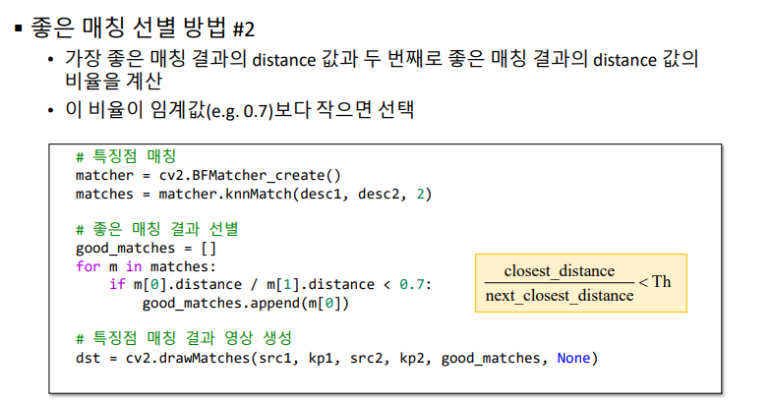

In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

!pip install opencv-python

In [2]:
src1 = cv2.imread('graf1.png', cv2.IMREAD_GRAYSCALE)

src2 = cv2.imread('graf3.png', cv2.IMREAD_GRAYSCALE)

if src1 is None or src2 is None:

    print('Image load failed!')

    sys.exit()

In [3]:
feature = cv2.KAZE_create()

#feature = cv2.AKAZE_create()

#feature = cv2.ORB_create()


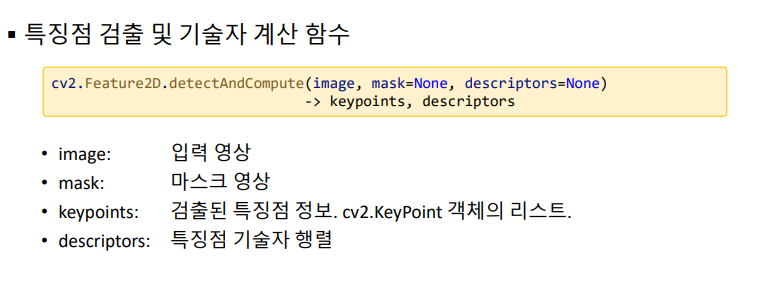

In [4]:
kp1, desc1 = feature.detectAndCompute(src1, None)

kp2, desc2 = feature.detectAndCompute(src2, None)

## AKAZE 또는 ORB사용할때 해밍을 써야한다 !!!

In [5]:
matcher = cv2.BFMatcher_create() #L2_Norm을 사용

#matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING) 

matches = matcher.match(desc1, desc2)

In [6]:
matches = sorted(matches, key=lambda x: x.distance)

good_matches = matches[:80]

In [7]:
print('# of kp1:', len(kp1))

print('# of kp2:', len(kp2))

print('# of matches:', len(matches))

print('# of good_matches:', len(good_matches))

# of kp1: 3159
# of kp2: 3625
# of matches: 3159
# of good_matches: 80


In [8]:
dst = cv2.drawMatches(src1, kp1, src2, kp2, good_matches, None)

((0.0, 1.0, 0.0, 1.0), <matplotlib.image.AxesImage at 0x271e24d9130>)

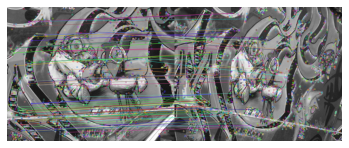

In [9]:
plt.axis('off'),plt.imshow(dst)

In [ ]:
cv2.namedWindow('dst',cv2.WINDOW_NORMAL)

cv2.imshow('dst', dst)

cv2.waitKey()

cv2.destroyAllWindows()